# **Questão 3**

Pesquise   e   apresente   um   trabalho   sobre   aprendizagem supervisionada,   semi-superviosionada,    não  supervisionada  e  aprendizagem  por  reforço. Exemplifique  com  problemas ou aplicações.

## **Aprendizagem Supervisionada** 

De acordo com Géron (2021), a aprendizagem supervisionada é uma técnica de aprendizado de máquina que envolve o treinamento de um modelo usando um conjunto de dados rotulados. Esses rótulos fornecem ao modelo exemplos de entrada e saída esperada, permitindo que ele aprenda a mapear entradas para saídas corretas. Essa abordagem é comumente usada em problemas de classificação e regressão. A figura 1 mostra um exemplo de classificação, onde a tarefa é aprender os padrões de e-mails que são <i>spam</i> e <i>não spam</i> a partir dos dados rotulados e classificar os novos e-mails que irão chegar.

<p align='center'>
    <img src='./images/supervised_classification.png'>
    Figura 1: Exemplo de um problema de classificação de aprendizado supervisionado. Fonte: Aurélien Géron (2021).
</p>


A figura 2 ilustra outro problema comum de aprendizagem supervisionada que é a predição de um valor numérico, como o preço de um carro a partir de várias caracteríscas (features) como odômetro, ano de fabricação, marca etc. Essa classe de problemas é chamada de regressão. 

<p align='center'>
    <img src='./images/supervised_regression.png'>
    Figura 2: Exemplo de um problema de regressão de aprendizado supervisionado. Fonte: Aurélien Géron (2021).
</p>

Alguns dos algoritmos mais importates desse tipo de aprendizagem são:

- K-Nearest Neighbors
- Linear Regression
- Logistic Regression
- Support Vector Machines (SVM)
- Decision Trees e Random Forests
- Neural Networks

### Aplicação

Classificação de e-mail entre <i>spam</i> e <i>não spam</i>.

In [8]:
# importing libraries
import torch
import pandas as pd
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# reading the data
emails = pd.read_csv('./datasets/emails.csv.zip')
emails.shape

(5172, 3002)

O conjunto de dados consiste em uma bag of words, ou seja, cada coluna representa uma coluna e seu valor consiste na quantidade de vezes que ela apareceu no email. A primeira coluna consiste apenas no número do email e não fornece informação relevantes para o treinamento, por isso, ela será retirada. Assim, têm-se 3000 features e a coluna do rótulo é representada por <i>Prediction</i>

In [4]:
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


No dataset, têm-se 3672 emails que não são spam (classe 0) e 1500 que são (classe 1).

In [6]:
emails.Prediction.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

A célula abaixo realiza a divisão entre o conjunto de dados de treinamento e o de teste numa proporção de 80/20, respectivamente.

In [35]:
# train test split
X = emails.drop(['Email No.','Prediction'], axis=1)
y = emails.Prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (4137, 3000)
X test shape:  (1035, 3000)
y train shape:  (4137,)
y test shape:  (1035,)


A seguir será treinado uma Random Forest com o intuito de aprender os padrões e classificar corretamente os emails.

In [44]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# training the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# predictions
y_pred = rfc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       739
           1       0.96      0.96      0.96       296

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



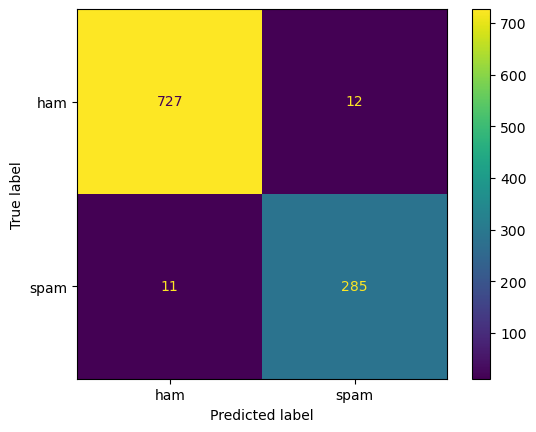

In [46]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam']).plot())

## **Aprendizagem Semi-Supervisionada** 


De acordo com Géron (2021), a aprendizagem semi-supervisionada é uma técnica de aprendizado de máquina que lida com conjuntos de dados que contêm uma grande quantidade de dados não rotulados e uma pequena quantidade de dados rotulados. O objetivo é utilizar tanto os dados rotulados quanto os não rotulados para treinar o modelo, permitindo que ele aprenda a classificar ou prever novos dados com maior precisão. Uma abordagem comum é treinar inicialmente o modelo com os dados rotulados e, em seguida, usar esses rótulos para propagar a informação para os dados não rotulados, gerando novos rótulos para eles.

Um exemplo de aplicação desse tipo de algoritmo é o Google Photos, o qual agrupa as pessoas com rostos parecidos nas fotos que estão hospedadas lá. Quando o usuário rotula o rosto de uma pessoa em uma foto, o algoritmo automaticamente rotula todas as outras fotos que possuem o rosto daquela pessoa com o rótulo que o usuário forneceu. A figura 4 ilustra o fuicionamento desse algoritmo

<p align='center'>
    <img src='./images/semisupervised.png'>
    Figura 4: Exemplo de um problema de aprendizado semi-supervisionado. Fonte: Aurélien Géron (2021).
</p>

Alguns dos algoritmos mais importantes desse tipo de aprendizagem são:
- Deep Belief Networks (DBNs)
- Restricted Boltzmann Machines (RBMs)

## **Aprendizagem Não Supervisionada**

De acordo com Géron (2021), a aprendizagem não supervisionada é uma técnica de aprendizado de máquina que lida com conjuntos de dados não rotulados, ou seja, dados que não possuem rótulos ou saídas esperadas. O objetivo é encontrar padrões, estruturas ou relações interessantes dentro desses dados, permitindo que o modelo aprenda a representação latente dos dados. Essa abordagem é comumente usada em tarefas como agrupamento, redução de dimensionalidade e detecção de anomalias.

Como exemplo de uma tarefa de agrupamento, suponha por exemplo que você tem um blog e deseja entender o perfil dos leitores do seu blog, como ilustra a figura 5. Com um algoritmo de agrupamento, você pode encontrar relações do tipo: 60% da sua audiência é representada por mulheres que leeem conteúdo cômico e acessam seu blog predominantemente à noite. Ou então, 20% dos seus leitores são jovens que amam ficção científica e que acessam seu blog no fim de semana. Essas relações são possíveis de serem visualizadas com agrupamentos hierárquicos, os quais possibilitam a divisão em sub-grupos.

<p align='center'>
    <img src='./images/unsupervised_clustering.png'>
    Figura 5: Exemplo de um problema de agrupamento de aprendizado não supervisionado. Fonte: Aurélien Géron (2021).
</p>

Um exemplo de redução de dimensionalidade é a visualização de dados. Suponha por exemplo que você tem um problema complexo de dados não rotulados e você deseja visualizar a distribuição desses dados sem perder muita informação. Então, é possível rodar um algoritmo que detecta as duas ou três features principais do problema e plotá-las com o intuito de visualização, como mostra a figura 6. Além disso, a redução de dimensionalidade pode ser usada como um extrator das features mais importantes para o treinamento de modelos supervisionados, por exemplo, com o intuito de diminuir a complexidade do problema. 

<p align='center'>
    <img src='./images/unsupervised_visualization.png'>
    Figura 6: Exemplo de um problema de redução de dimensionalidade de aprendizado não supervisionado. Fonte: Aurélien Géron (2021).
</p>

Por fim, exemplos na área de detecção de anomalias são: prevenir a fraude de cartões de crédito, detectar defeitos de fabrição ou até detectar outliers no conjunto de dados. O algoritmo aprende as instâncias normais durante o treinamento e, partir delas, pode inferir se uma nova instância que chegou faz parte ou não do padrão aprendido, como mostra a figura 7.

<p align='center'>
    <img src='./images/unsupervised_anomaly_detection.png'>
    Figura 7: Exemplo de um problema de detecção de anomalia de aprendizado não supervisionado. Fonte: Aurélien Géron (2021).
</p>

Alguns dos algoritmos mais importantes desse tipo de aprendizado são:

- Principal Component Analysis (PCA)
- Kernel PCA
- Locally-Linear Embedding (LLE)
- t-distributed Stochastic Neighbor Embedding (t-SNE)


## **Aprendizagem por Reforço**

De acordo com Géron (2021), a aprendizagem por reforço é uma técnica de aprendizado de máquina que lida com um agente que aprende a tomar decisões em um ambiente incerto, através de tentativa e erro. O agente interage com o ambiente em um ciclo contínuo, recebendo um estado como entrada, tomando uma ação e recebendo uma recompensa em resposta. O objetivo é aprender uma política, ou seja, uma função que mapeia estados para ações, que maximize a recompensa acumulada ao longo do tempo. 

Um exemplo de aplicação de aprendizagem por reforço é como ensinar a um robô pode andar e interagir com o ambiente, como ilustra a figura 8. Primeiro, ele observa o ambiente, seleciona uma ação a partir de uma política e a realiza. A partir desse evento, o robô pode receber uma recompensa ou uma penalidade, a qual será utilizada para a atualização da política na próxima iteração. Esse processo é realizado até se encontrar a política ótima. 

<p align='center'>
    <img src='./images/unsupervised_anomaly_detection.png'>
    Figura 8: Exemplo de um problema de aprendizagem por reforço. Fonte: Aurélien Géron (2021).
</p>

Um exemplo famoso nessa é a o algoritmo AlphaGo da empresa DeepMind, o qual conseguiu ganhar do campeão mundial Ke Jie do game japonês <i>Go</i>. O algoritmo aprendeu sua política vencedora analisando milhões de jogos e depois jogando muitos jogos contra si mesmo. É importante destacar que o aprendizado foi desativado durante os jogos contra o campeão; AlphaGo estava apenas aplicando a política que havia aprendido.

Alguns dos algoritmos mais famosos desse tipo de aprendizado são:

- Processo de Decisão de Markov
- Q de aprendizagem

## Referências

- Géron, A. Mãos A Obra: Aprendizado De Máquina Com Scikit-Learn, Keras & TensorFlow: Conceitos, Ferramentas e Técnicas Para a Construção de Sistemas Inteligentes. O'reilly, 2021.